<h1>Pre-procesamiento y limpieza de Datos</h1>

In [1]:
'''Importar la libreria para la realizacion de este laboratorio.'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
'''Obtener el Dataset para mostrar todo su contenido.'''
df = pd.read_csv("data_act_01.csv",sep=";")
df.sample(10)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
7225,160950790,Traffic Stop,2016-04-04T00:00:00,8:43,2016-04-04T08:43:00,CIT,Broadway/montgomery St,San Francisco,CA,1,NaN,Intersection
2826,160930890,Suspicious Person,2016-04-02T00:00:00,8:51,2016-04-02T08:51:00,HAN,Golden Gate Av/hyde St,San Francisco,CA,1,NaN,Intersection
884,160921398,Suspicious Person,2016-04-01T00:00:00,11:37,2016-04-01T11:37:00,UTL,Elizabeth St/noe St,San Francisco,CA,1,NaN,Intersection
3924,160932861,Traffic Stop,2016-04-02T00:00:00,18:14,2016-04-02T18:14:00,ADV,400 Block Of Minna St,San Francisco,CA,1,NaN,Premise Address
9753,160962915,Suspicious Person,2016-04-05T00:00:00,17:12,2016-04-05T17:12:00,HAN,1400 Block Of Haight St,San Francisco,CA,1,NaN,Premise Address
9266,160960916,Burglary,2016-04-05T00:00:00,9:14,2016-04-05T09:14:00,HAN,600 Block Of 2nd St,San Francisco,CA,1,NaN,Premise Address
7357,160951035,Homeless Complaint,2016-04-04T00:00:00,9:45,2016-04-04T09:45:00,ADV,700 Block Of Illinois St,San Francisco,CA,1,NaN,Premise Address
2900,160931036,Fight No Weapon,2016-04-02T00:00:00,9:36,2016-04-02T09:36:00,ADV,2800 Block Of Leavenworth St,San Francisco,CA,1,NaN,Premise Address
5761,160942094,Traf Violation Tow,2016-04-03T00:00:00,14:24,2016-04-03T14:24:00,GOA,200 Block Of Douglass St,San Francisco,CA,1,NaN,Premise Address
5244,160941186,Traffic Stop,2016-04-03T00:00:00,10:01,2016-04-03T10:01:00,ADV,Harrison St/langton St,San Francisco,CA,1,NaN,Intersection


In [3]:
'''Observar el tipo de variables que contiene el dataframe'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CrimeId                10051 non-null  int64  
 1   OriginalCrimeTypeName  10051 non-null  object 
 2   OffenseDate            10051 non-null  object 
 3   CallTime               10051 non-null  object 
 4   CallDateTime           10051 non-null  object 
 5   Disposition            10051 non-null  object 
 6   Address                10051 non-null  object 
 7   City                   9730 non-null   object 
 8   State                  10048 non-null  object 
 9   AgencyId               10051 non-null  object 
 10  Range                  0 non-null      float64
 11  AddressType            10051 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 942.4+ KB


In [4]:
'''Detectar valores nulos y su conteo'''
df.isnull().sum()

CrimeId                      0
OriginalCrimeTypeName        0
OffenseDate                  0
CallTime                     0
CallDateTime                 0
Disposition                  0
Address                      0
City                       321
State                        3
AgencyId                     0
Range                    10051
AddressType                  0
dtype: int64

In [5]:
'''Observar la cantidad de filas en el dataset.'''
df.shape

(10051, 12)

# Primer error (Columnas Innecesarias)
Anlizando el dataset existen columnas que no aportan informacion valiosa para el desarrollo o analisis posterior de que sea util para la materia de mineria de datos. Es por esto que se decidio eliminar la columna Range y la columna CallDateTime. La columna Range no tenia ningun valor. Y la columna CallDateTime tenia informacion redundante. Corregimos el error de esta forma.

In [6]:
'''Eliminar la columna "Range" ya que observando los registros se observa que no posee ningun dato.'''
df = df.drop(['Range'], axis=1)
df.sample(10)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
9694,160962692,Traffic Stop,2016-04-05T00:00:00,16:23,2016-04-05T16:23:00,CIT,400 Block Of 2nd St,San Francisco,CA,1,Premise Address
1330,160922339,Assault / Battery Dv,2016-04-01T00:00:00,15:54,2016-04-01T15:54:00,GOA,Market St/steuart St,San Francisco,CA,1,Intersection
8616,160953361,Noise Nuisance,2016-04-04T00:00:00,19:09,2016-04-04T19:09:00,UTL,800 Block Of Naples St,San Francisco,CA,1,Premise Address
9671,160962608,7.2.25,2016-04-05T00:00:00,16:07,2016-04-05T16:07:00,GOA,900 Block Of Corbett Av,San Francisco,CA,1,Premise Address
785,160921209,Well Being Check,2016-04-01T00:00:00,10:33,2016-04-01T10:33:00,HAN,Ocean Av/junipero Serra Bl,San Francisco,CA,1,Intersection
8954,160954052,Traffic Stop,2016-04-04T00:00:00,22:53,2016-04-04T22:53:00,ADV,The Embarcadero Sou/howard St,San Francisco,CA,1,Intersection
683,160921022,Suspicious Vehicle,2016-04-01T00:00:00,9:35,2016-04-01T09:35:00,ADV,700 Block Of Indiana St,San Francisco,CA,1,Premise Address
4172,160933340,Encampments,2016-04-02T00:00:00,20:34,2016-04-02T20:34:00,GOA,2100 Block Of Market St,San Francisco,CA,1,Premise Address
4616,160940067,415,2016-04-03T00:00:00,0:17,2016-04-03T00:17:00,HAN,100 Block Of Chumasero Dr,San Francisco,CA,1,Premise Address
2614,160930520,Audible Alarm,2016-04-02T00:00:00,4:39,2016-04-02T04:39:00,NCR,1500 Block Of Broadway,San Francisco,CA,1,Premise Address


In [7]:
'''Eliminar la columna "CallDateTime" ya que observando 
los registros es la misma informacion ya presentada en 
otras columas.'''
df = df.drop(['CallDateTime'], axis=1)
df.sample(10)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,City,State,AgencyId,AddressType
4491,160933923,22500e,2016-04-02T00:00:00,23:24,CIT,300 Block Of Bright St,San Francisco,CA,1,Premise Address
9343,160961197,Passing Call,2016-04-05T00:00:00,10:28,HAN,100 Block Of Dr Tom Waddell Pl,San Francisco,CA,1,Premise Address
4398,160933774,Complaint Unkn,2016-04-02T00:00:00,22:43,HAN,100 Block Of Granada Av,San Francisco,CA,1,Premise Address
5255,160941210,Dw,2016-04-03T00:00:00,10:07,CIT,4600 Block Of Irving St,San Francisco,CA,1,Premise Address
5958,160942437,Rep,2016-04-03T00:00:00,16:05,CAN,3400 Block Of 22nd St,San Francisco,CA,1,Premise Address
4644,160940118,Party,2016-04-03T00:00:00,0:32,UTL,Ivy St/laguna St,San Francisco,CA,1,Intersection
6301,160943029,Traffic Stop,2016-04-03T00:00:00,19:03,REP,Lake St/19th Av,San Francisco,CA,1,Intersection
5817,160942203,Traffic Stop,2016-04-03T00:00:00,14:54,CIT,7th St/mission St,San Francisco,CA,1,Intersection
9697,160962702,Fight No Weapon,2016-04-05T00:00:00,16:26,REP,21st St/harrison St,San Francisco,CA,1,Intersection
5994,160942506,Passing Call,2016-04-03T00:00:00,16:27,HAN,San Anselmo Av/saint Francis Bl,San Francisco,CA,1,Intersection


# Segundo error (Valores duplicados)

In [8]:
'''Conteo de ids duplicados, y verificacion de los mismos.'''
print("CrimeId: ",df['CrimeId'].duplicated().sum())
df[df.duplicated(subset=['CrimeId'],keep=False)];

CrimeId:  4


Como se aprecia, existen 4 registros repetidos los cuales analizamos y se tratan de 2 IDs que se registran en 3 ocasiones cada uno, de modo que el sistema asigna 4 repeticiones. Vamos a corregir este error.

In [9]:
'''Realizamos una función la cual crea un set de la lista
de los datos duplicados existentes en la columna CrimeId'''
duplic = df.index[df.duplicated(subset=['CrimeId'],keep=False)].tolist()
maximo = df['CrimeId'].max()

In [10]:
'''Mediante el uso de un ciclo for el cual debe 
recorrer la lista de duplicados. A cada duplicado
se le asigna un nuevo Id, el cual es el valor 
maximo de los IDs aumentado en 1.'''
for r in duplic:
  maximo += 1
  df['CrimeId'].iloc[r] = maximo

C:\Users\User\AppData\Local\Temp\ipykernel_16840\2075909998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CrimeId'].iloc[r] = maximo


In [11]:
'''Verificamos si se cambiaron los datos'''
dup = df[df['CrimeId'].duplicated(keep=False)]['CrimeId'].tolist()
dup

[]

# Tercer error (Rellenar valores faltantes)

In [12]:
'''Se reemplaza los valores vacios que existen 
en las columnas City por valores en Cero, 
ya que al tener valores nulos pueden generar
errores adicionales en este contexto.'''

df[['City', 'State']] = df[['City','State']].fillna(value=0)
df

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,City,State,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,REP,100 Block Of Chilton Av,San Francisco,CA,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,GOA,500 Block Of 7th St,San Francisco,CA,1,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,REP,Beale St/bryant St,San Francisco,CA,1,Intersection
...,...,...,...,...,...,...,...,...,...,...
10046,160964210,Well Being Check,2016-04-05T00:00:00,23:38,GOA,Hollister Av/hawes St,San Francisco,CA,1,Intersection
10047,160964216,Traffic Stop,2016-04-05T00:00:00,23:43,ADV,California St/mason St,San Francisco,CA,1,Intersection
10048,160964227,Traffic Stop,2016-04-05T00:00:00,23:48,CIT,Rosella Ct/onondaga Av,San Francisco,CA,1,Intersection
10049,160964229,Passing Call,2016-04-05T00:00:00,23:48,Not recorded,0 Blk Herbst Rd,San Francisco,CA,1,Geo-Override


In [13]:
'''Verificar la redundancia de datos en la columna de City'''
df.groupby('City').count()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,State,AgencyId,AddressType
City,,,,,,,,,
0,321,321,321,321,321,321,321,321,321
S,1,1,1,1,1,1,1,1,1
Brisbane,1,1,1,1,1,1,1,1,1
Daly City,5,5,5,5,5,5,5,5,5
Presidio,3,3,3,3,3,3,3,3,3
SAN FRANCISCO,1,1,1,1,1,1,1,1,1
San Francisco,9665,9665,9665,9665,9665,9665,9665,9665,9665
Treasure Isla,51,51,51,51,51,51,51,51,51
Yerba Buena,3,3,3,3,3,3,3,3,3


<h1>Analisis</h1>
Observamos que existian 321 valores nulos que fueron reemplazados por 0 Analizando las direccciones de estas filas, nos podemos dar cuenta que todas pertenecen a la ciudad de San Francisco, asi que reemplazaremos estos Valores por San Francisco. Del mismo modo se observan dos errores, existe una columna con la letra S, probablemente de San Francisco, comprobaremos la direccion de esta para estar seguros de que la ciudad es San Francisco. Asi mismo observamos que existe un dato con mayusculas. Vamos a corregir ese error.

# Cuarto error (Datos no correspondientes)
En esta seccion se analizan los datos de varias columnas que no corresponden a sus datos hermanos en las filas anteriores. Esto con el fin de homogenizar los datos y que tengan un mejor sentido. Para comenzar analizamos las columnas de Ciudad, Seguido de la columna Disposition y por ultimo la columna de OriginalCrimeTypeName. 

In [14]:
'''Se reemplaza el dato en mayusculas, por minusculas.'''
df['City'] = df['City'].replace('SAN FRANCISCO','San Francisco');

In [15]:
'''Se reemplaza ahora la letra S por la ciudad de San Francisco'''
df['City']= df['City'].replace(' S','San Francisco')

In [16]:
'''Se reemplaza ahora las filas de 0 por la ciudad de San Francisco'''
df['City']= df['City'].replace(0,'San Francisco')

In [17]:
'''Verificar la redundancia de datos en la columna de City otra vez'''
df.groupby('City').count()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,State,AgencyId,AddressType
City,,,,,,,,,
Brisbane,1,1,1,1,1,1,1,1,1
Daly City,5,5,5,5,5,5,5,5,5
Presidio,3,3,3,3,3,3,3,3,3
San Francisco,9988,9988,9988,9988,9988,9988,9988,9988,9988
Treasure Isla,51,51,51,51,51,51,51,51,51
Yerba Buena,3,3,3,3,3,3,3,3,3


In [18]:
'''Observamos el archivo .csv en el software Microsft Excel para una mayor rapidez de analisis'''
df.to_csv('Prueba-version-12.csv',sep=';')

Haciendo una busqueda en internet acerca de los codigos de disposicion del dpto de policia de San Francisco, se obtuvieron 17 codigo que los policias utilizan en este ambito. Los cuales se resumen en la siguiente lista: ABA, ADM, ADV, ARR, CAN, CIT, CRM,  HAN, NCR, PAS, REP, VAS, 10-22, NOM, GOA, ND y UTL. Observando el dataset realizaremos los siguientes cambios en las filas.

In [26]:
'''Se reemplaza el dato 22 por el codigo de disposicion 10-22'''
df['Disposition'] = df['Disposition'].replace('22','10-22');

In [27]:
'''Se reemplaza el dato Not recorded por el codigo de disposicion ND'''
df['Disposition'] = df['Disposition'].replace('Not recorded','ND');

In [28]:
'''Verificamos los codigos correctamente reemplazados.'''
df.groupby('Disposition').count()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Address,City,State,AgencyId,AddressType
Disposition,,,,,,,,,
10-22,77,77,77,77,77,77,77,77,77
ABA,97,97,97,97,97,97,97,97,97
ADM,48,48,48,48,48,48,48,48,48
ADV,1142,1142,1142,1142,1142,1142,1142,1142,1142
ARR,65,65,65,65,65,65,65,65,65
CAN,353,353,353,353,353,353,353,353,353
CIT,1425,1425,1425,1425,1425,1425,1425,1425,1425
CRT,2,2,2,2,2,2,2,2,2
GOA,1273,1273,1273,1273,1273,1273,1273,1273,1273


In [20]:
'''Verificamos nuevamente los valores nulos, 
como se observa existen 3 estados que son nulos.'''
df.isnull().sum()

CrimeId                  0
OriginalCrimeTypeName    0
OffenseDate              0
CallTime                 0
Disposition              0
Address                  0
City                     0
State                    0
AgencyId                 0
AddressType              0
dtype: int64

# Quinto error (Valores desubicados)
Para este error, se tiene que la columna State posee algunos datos con "1" en lugar de "CA", haciendo referencia al 1 de su ID de agencia, esto quiere decir que los datos fueron recorridos un espacio hacia la derecha. para corregir este error realizaremos el siguiente cambio en el dataframe.

In [21]:
'''Se verifica la columna state para analizar los valores nulos.
Como se observa existen 3 valores que no tienen valor de estado,
asi que corregiremos este error reemplazando este valor por el estado
correspondiente que es CA.'''
df.groupby('State').count()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,City,AgencyId,AddressType
State,,,,,,,,,
0,3,3,3,3,3,3,3,3,3
CA,10048,10048,10048,10048,10048,10048,10048,10048,10048


In [22]:
'''Reemplazo de los valores 0 de la columna estado.'''
df['State']= df['State'].replace(0,'CA')

In [23]:
'''Verificar nuevamente'''
df.groupby('State').count()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,City,AgencyId,AddressType
State,,,,,,,,,
CA,10051,10051,10051,10051,10051,10051,10051,10051,10051


# Sexto error (Valores innecesario - Tipos de dato)
En el dataset, en la columman de OffenseDate observamos que posee un valor de mas, que en este caso seria la hora, pero este dato lo tenemos ya separado en la columman de CallTime 

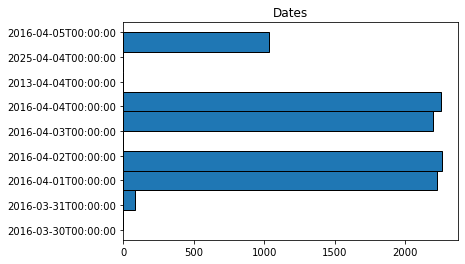

In [29]:
plt.title('Dates')
plt.hist(df['OffenseDate'],edgecolor='black',linewidth=1,orientation='horizontal')
plt.show()